**MNIST**

We will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau.  

In [29]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

Each image has 784 features, because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

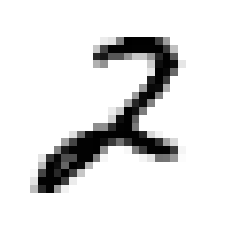

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[36001]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [51]:
y[36001]

2

Конвертим строки в числа:

In [42]:
import numpy as np

y = y.astype(np.uint8)

The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):

In [43]:
 X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The training set is already shuffled for us, which is good as this guarantees that all cross-validation folds will be similar

**Binary Classifier**

In [53]:
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

**Stochastic Gradient Descent (SGD)**

In [62]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train.values, y_train_2.values)

SGDClassifier(random_state=42)

In [63]:
sgd_clf.predict([some_digit])

array([ True])